In [136]:
!pip install scikit-plot

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import scikitplot as skplt


In [0]:
wine_data = load_wine()

X = np.array(wine_data.data)
y = np.array(wine_data.target)

In [139]:
num_features = wine_data.data.shape[1]
unique_labels = np.unique(y)
num_classes = len(unique_labels)

print(str(num_features) + " features")
print(wine_data.feature_names)
print()
print(str(num_classes) + " categoryes")
print(wine_data.target_names)


13 features
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

3 categoryes
['class_0' 'class_1' 'class_2']


In [140]:
data = pd.DataFrame(data=np.c_[X, y], columns=wine_data.feature_names + ['category'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  categ

In [141]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


1.0    71
0.0    59
2.0    48
Name: category, dtype: int64 




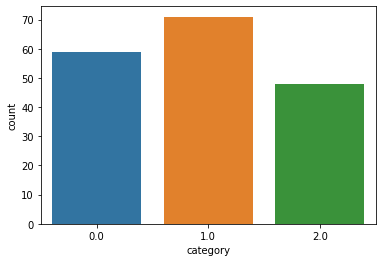

In [142]:
print(data['category'].value_counts(),"\n\n")
sns.countplot(data['category'])

**PairPlot**

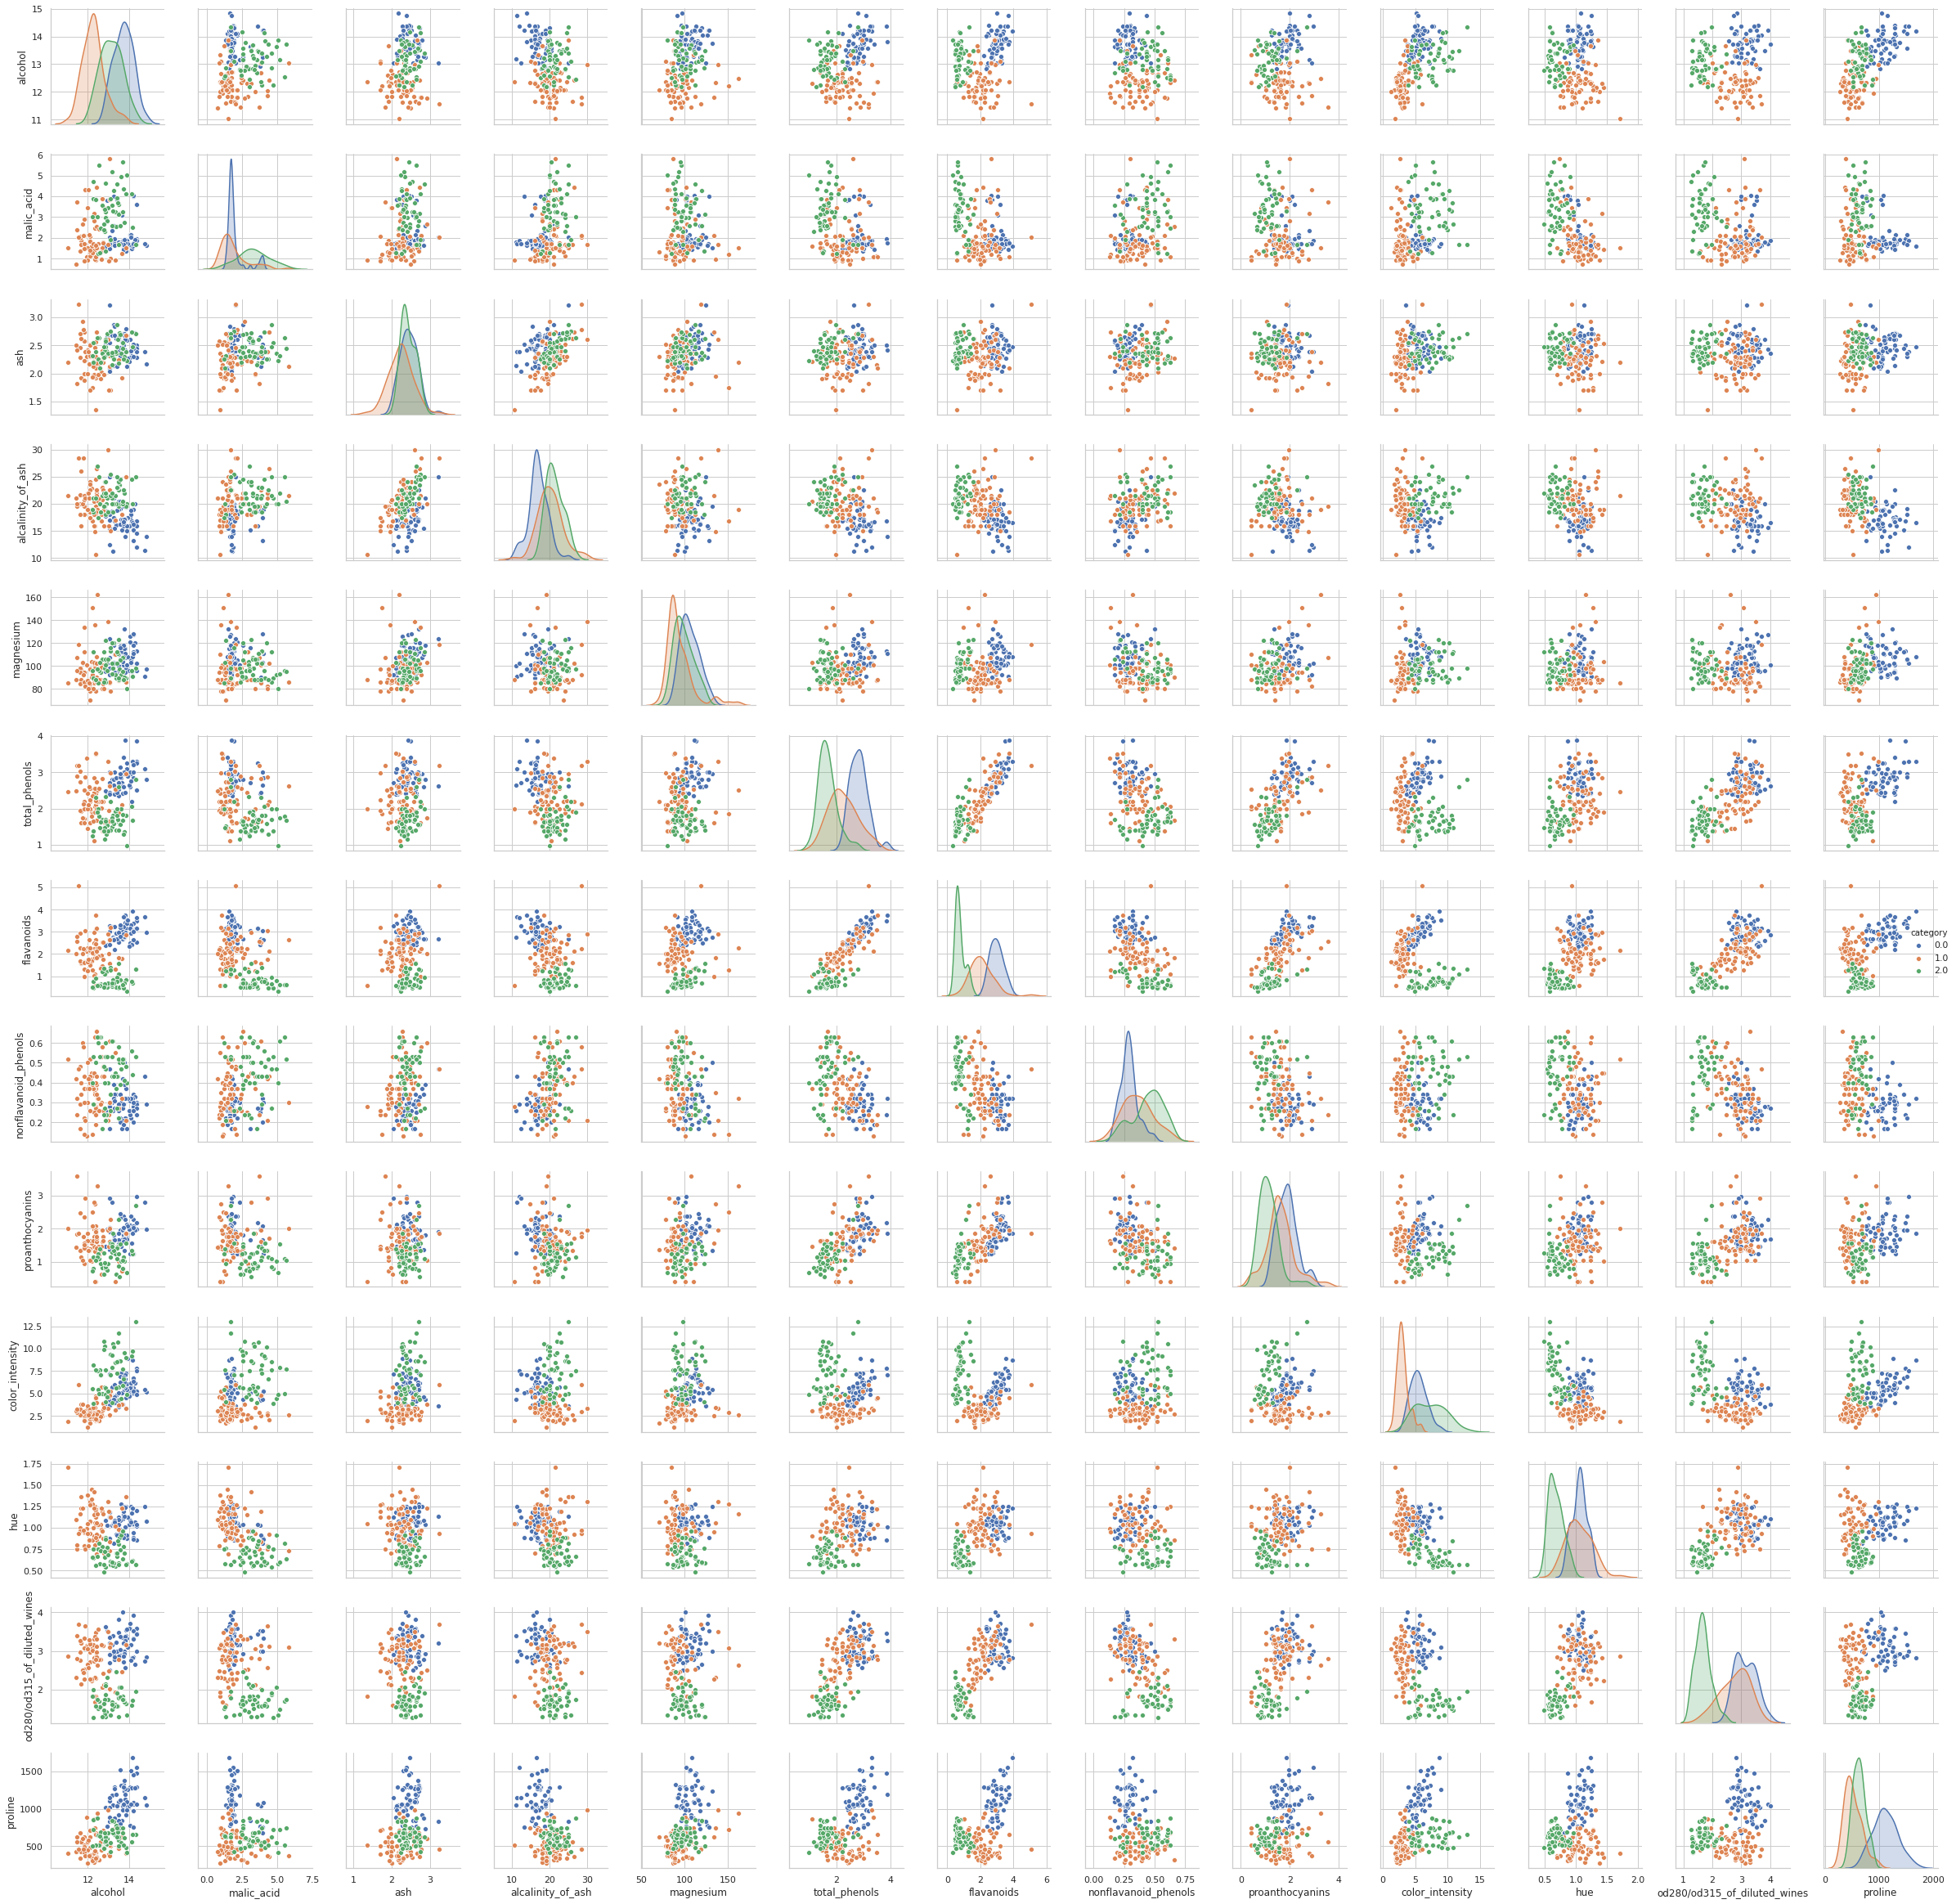

In [163]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(data, hue="category", height = 2.5)
plt.tight_layout()

Good feature combination is a feature combination that separates some of the class labels.<br> 
'Flavanoids' in row 7 looks like a good feature combined with the other ones. Same goes for 'Proline' in the last row, using these they can be classify sepeartly.

On the other hand 'Malic_acid' (2nd row) and Magnesium (5th row) does not look like a good feature at all.

In [0]:
# Standardizing data
X = StandardScaler().fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,  stratify = y )

In [0]:
def plot_confusion_matrix(score, y_pred):
  cm = metrics.confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'viridis');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
  plt.title(all_sample_title, size = 15);

##**Gaussian Naive Bayes Model**

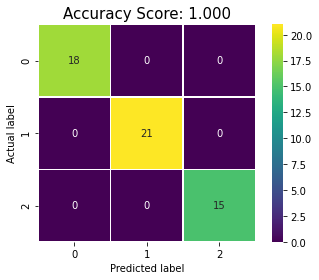

In [147]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

test_score = metrics.accuracy_score(y_test, y_pred)
train_score = metrics.accuracy_score(gnb.predict(X_train),y_train)
score_list = [[train_score, test_score, f1_score(y_test,y_pred, average='macro')]]
plot_confusion_matrix(test_score, y_pred)

In [148]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



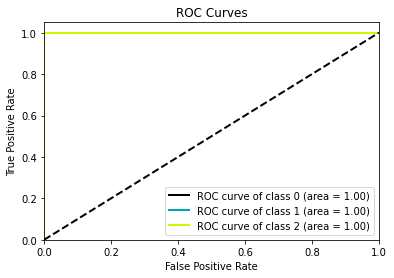

In [149]:
y_probas = gnb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,plot_macro=False, plot_micro=False)
plt.show()

Navies Bayes Model is giving 100% accuracy and F1 score on testing data using random seed 42 .<br> 
Also by looking at the roc curve it can concluded that  has good measure of separability as all the values are 1.<br>
So it is an excellent model.

## **DecisionTreeClassifier**

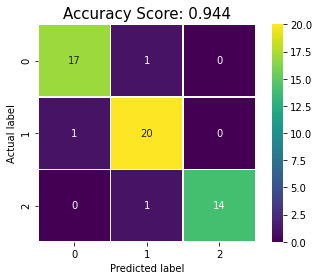

In [150]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier()

dct.fit(X_train, y_train)

y_pred = dct.predict(X_test)

test_score = metrics.accuracy_score(y_test, y_pred)
train_score = metrics.accuracy_score(dct.predict(X_train),y_train)
score_list.append([train_score, test_score, f1_score(y_test, y_pred, average="macro")])
plot_confusion_matrix(test_score, y_pred)

In [151]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.91      0.95      0.93        21
           2       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



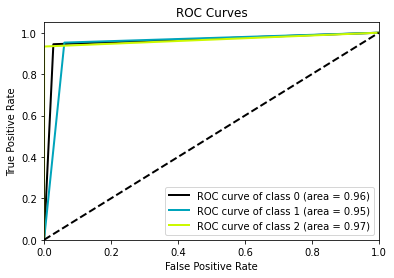

In [152]:
y_probas = dct.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,plot_macro=False, plot_micro=False)
plt.show()

Decision Tree Classifier without hyperparameter tunning is giving 3 misclassified results.<br>
Overall accuracy and f1 score is also less than Naive Bayes Classifier
and the values of roc curve are not good as the other models.<br>

**Parameter Tunning**

In [153]:
from sklearn.model_selection import GridSearchCV

param_dict ={ "criterion" : ["gini", "entropy"], "max_depth": [1,2,3,4,5,6,7,None]}

grid = GridSearchCV(dct, param_grid = param_dict, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [154]:
print("Best estimator:", grid.best_estimator_)
print("\nBest parameters:", grid.best_params_)

Best estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Best parameters: {'criterion': 'gini', 'max_depth': 3}


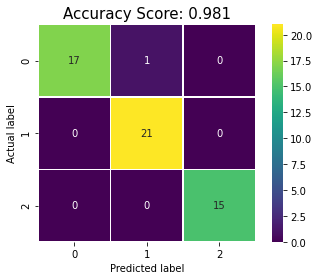

In [155]:
y_pred = grid.predict(X_test)

test_score = metrics.accuracy_score(y_test, y_pred)
train_score = metrics.accuracy_score(grid.predict(X_train),y_train)
score_list.append([train_score, test_score, f1_score(y_test, y_pred, average="macro")])
plot_confusion_matrix(test_score, y_pred)

In [156]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



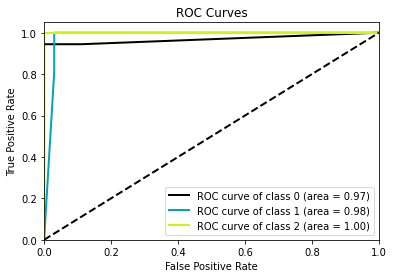

In [157]:
y_probas = grid.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,plot_macro=False, plot_micro=False)
plt.show()

Decision Tree Classifier with hyperparameter tunning is giving only 1 misclassified results which is better than Decision Tree Classifier without tunned parameter and the values of roc curve are very close to 1 so it has good seperability too.<br>
but its accuracy and F1 score are not good as naive bayes model.

##**KNearest Neighbors Classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

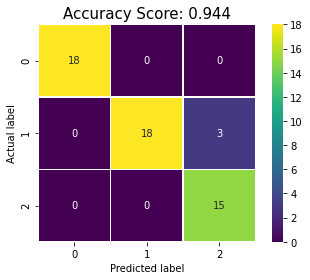

In [159]:
test_score = metrics.accuracy_score(y_test, y_pred)
score_list.append([train_score, test_score, f1_score(y_test, y_pred, average="macro")])
plot_confusion_matrix(test_score, y_pred)

In [160]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



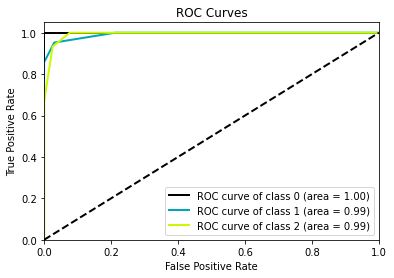

In [161]:
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,plot_macro=False, plot_micro=False)
plt.show()

K nearest model is giving good accuracy on training data but not on testing data which states that it is a slightly overfitted model.<br> It is also giving 3 miss classified results and F1 score of KNN model is also less than the above models. 
So, it is not a good model as compared to rest of the models.

##**Conclusion**

In [162]:
score_df = pd.DataFrame(score_list, index=["Naive Bayes Classifier", "Decision Tree Classifier", "DecisionTreeClassifier (Parameter Tunned)", "KNN Classifier"], columns=["Train Accuracy", "Test Accuracy", "F1 Score"])
# round(score_df*100, 2)
from tabulate import tabulate
print(tabulate(round(score_df*100, 2), headers='keys', tablefmt='pretty'))

+-------------------------------------------+----------------+---------------+----------+
|                                           | Train Accuracy | Test Accuracy | F1 Score |
+-------------------------------------------+----------------+---------------+----------+
|          Naive Bayes Classifier           |     96.77      |     100.0     |  100.0   |
|         Decision Tree Classifier          |     100.0      |     94.44     |  94.67   |
| DecisionTreeClassifier (Parameter Tunned) |     99.19      |     98.15     |  98.27   |
|              KNN Classifier               |     99.19      |     94.44     |  94.41   |
+-------------------------------------------+----------------+---------------+----------+


By above results it is clear that Naive Bayes Classifier is the best model beacuse
1. It has the best accuracy and the F1 Score.
2. It is giving 0 misclassified result on testing data.
3. All the values in roc curve is 1 which states that it has good measure of separability too.